# WeatherPy

In [4]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

 ## Perform API Calls

In [6]:
# Create url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
query_url = f"{url}appid={weather_api_key}&q="

date=[]
country=[]
city_name=[]
lat=[]
lon=[]
temp=[] 
cloud=[]
humidity=[]
w_speed=[]

proc_num=1
set_num=1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        
        print(f"Processing Record {proc_num} of Set {set_num} | {city}")
        if (proc_num==50):
            proc_num=0
            set_num=set_num+1
        else:
            proc_num=proc_num+1
        
        response=requests.get(query_url+city).json()
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        lon.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp_max"])
        cloud.append(response["clouds"]['all'])
        humidity.append(response["main"]["humidity"])
        w_speed.append(response["wind"]["speed"])
        
    except Exception:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | hambantota
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | ibra
Processing Record 16 of Set 1 | marcona
City not found. Skipping...
Processing Record 17 of Set 1 | askino
Processing Record 18 of Set 1 | bikaner
Processing Record 19 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processin

Processing Record 32 of Set 4 | temaraia
City not found. Skipping...
Processing Record 33 of Set 4 | polunochnoye
Processing Record 34 of Set 4 | salinopolis
Processing Record 35 of Set 4 | pandamatenga
Processing Record 36 of Set 4 | hasaki
Processing Record 37 of Set 4 | wuwei
Processing Record 38 of Set 4 | kaset sombun
Processing Record 39 of Set 4 | kloulklubed
Processing Record 40 of Set 4 | araouane
Processing Record 41 of Set 4 | calabaca
Processing Record 42 of Set 4 | najran
Processing Record 43 of Set 4 | mogadishu
Processing Record 44 of Set 4 | samusu
City not found. Skipping...
Processing Record 45 of Set 4 | oussouye
Processing Record 46 of Set 4 | manaure
Processing Record 47 of Set 4 | dharur
Processing Record 48 of Set 4 | rantepao
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | tautira
Processing Record 0 of Set 5 | do gonbadan
Processing Record 1 of Set 5 | saint-augustin
Processing Record 2 of Set 5 | flinde

Processing Record 14 of Set 8 | kruisfontein
Processing Record 15 of Set 8 | alagoa nova
Processing Record 16 of Set 8 | port-cartier
Processing Record 17 of Set 8 | sarai naurang
Processing Record 18 of Set 8 | el colomo
Processing Record 19 of Set 8 | karratha
Processing Record 20 of Set 8 | kokopo
Processing Record 21 of Set 8 | bud
Processing Record 22 of Set 8 | karakol
Processing Record 23 of Set 8 | srednekolymsk
Processing Record 24 of Set 8 | olafsvik
Processing Record 25 of Set 8 | kabare
Processing Record 26 of Set 8 | kaitong
Processing Record 27 of Set 8 | ballina
Processing Record 28 of Set 8 | manokwari
Processing Record 29 of Set 8 | bandarbeyla
Processing Record 30 of Set 8 | arlit
Processing Record 31 of Set 8 | hamamatsu
Processing Record 32 of Set 8 | kidal
Processing Record 33 of Set 8 | dzhebariki-khaya
Processing Record 34 of Set 8 | brovary
Processing Record 35 of Set 8 | lavrentiya
Processing Record 36 of Set 8 | cabo san lucas
Processing Record 37 of Set 8 | p

Processing Record 3 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 12 | egvekinot
Processing Record 5 of Set 12 | stokmarknes
Processing Record 6 of Set 12 | mountain home
Processing Record 7 of Set 12 | batagay-alyta
Processing Record 8 of Set 12 | igarka
Processing Record 9 of Set 12 | berzasca
Processing Record 10 of Set 12 | boshnyakovo
Processing Record 11 of Set 12 | santa maria
Processing Record 12 of Set 12 | havoysund
Processing Record 13 of Set 12 | pingliang
Processing Record 14 of Set 12 | voh
Processing Record 15 of Set 12 | abu zabad
Processing Record 16 of Set 12 | beyneu
Processing Record 17 of Set 12 | zapolyarnyy
Processing Record 18 of Set 12 | manama
Processing Record 19 of Set 12 | port augusta
Processing Record 20 of Set 12 | bilma
Processing Record 21 of Set 12 | lima
Processing Record 22 of Set 12 | karamea
City not found. Skipping...
Processing Record 23 of Set 12 | chirongui
Processing Record 24 of Set 12 | isangel
Processing Recor

## Convert Raw Data to DataFrame

In [7]:
# Create DF
weather_df=pd.DataFrame({"Date": date,
                         "Country": country,
                         "City": city_name,
                         "Lat": lat,
                         "Lon": lon,
                         "Max Tem": temp,
                         "Cloudiness": cloud,
                         "Humidity": humidity,
                         "Wind Speed": w_speed})
# Export the city data into a .csv.
weather_df.to_csv(output_data_file,index=False,header=True)

In [8]:
# Display the DataFrame
weather_df.count()

Date          558
Country       558
City          558
Lat           558
Lon           558
Max Tem       558
Cloudiness    558
Humidity      558
Wind Speed    558
dtype: int64

In [9]:
weather_df

,Date,Country,City,Lat,Lon,Max Tem,Cloudiness,Humidity,Wind Speed
0,1586628128,CK,Avarua,-21.21,-159.78,78.80,65,100,2.24
1,1586628171,ZA,Bredasdorp,-34.53,20.04,70.00,100,82,3.36
2,1586628265,NZ,Mataura,-46.19,168.86,54.00,100,74,3.00
3,1586628265,US,Saint Paul Harbor,57.79,-152.41,39.20,90,80,17.22
4,1586628068,MX,San Patricio,19.22,-104.70,86.00,40,74,11.41
...,...,...,...,...,...,...,...,...,...
553,1586628354,RU,Chara,56.91,118.26,33.80,98,60,1.72
554,1586628354,LK,Kalmunai,7.42,81.82,81.99,15,77,6.11
555,1586628118,NO,Honningsvåg,70.98,25.97,29.61,99,90,5.48
556,1586628354,CN,Zhengjiatun,43.51,123.51,42.78,0,54,5.08


## Plotting the Data

### Latitude vs. Temperature Plot

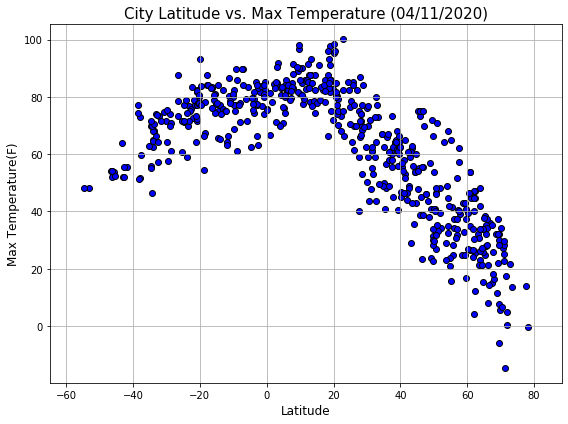

In [12]:
# Get current date
current_d=datetime.now().strftime("%m/%d/%Y")

x_axis=weather_df["Lat"]
y_axis=weather_df["Max Tem"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Max Temperature(F)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Max Temperature ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Max Tem"])-5,max(weather_df["Max Tem"])+5)
plt.grid()
plt.tight_layout()
plt.savefig('plot_images/City Latitude vs. Max Temperature.png')
plt.show()

#### The Conclusion: TBD

### Latitude vs. Humidity Plot

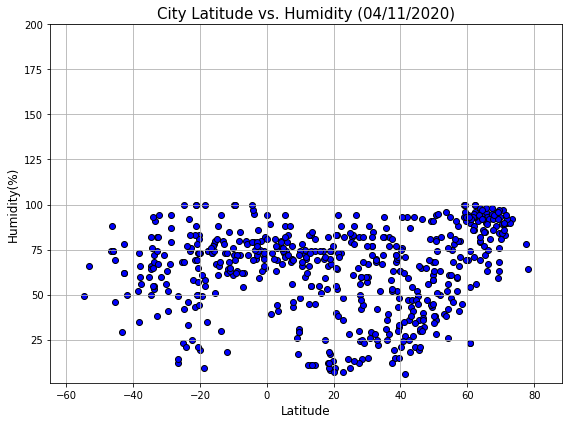

In [13]:
x_axis=weather_df["Lat"]
y_axis=weather_df["Humidity"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Humidity(%)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Humidity ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Humidity"])-5,max(weather_df["Humidity"])+100)
plt.grid()
plt.tight_layout()
plt.savefig('plot_images/City Latitude vs. Humidity.png')
plt.show()

#### The Conclusion: TBD

### Latitude vs. Cloudiness Plot

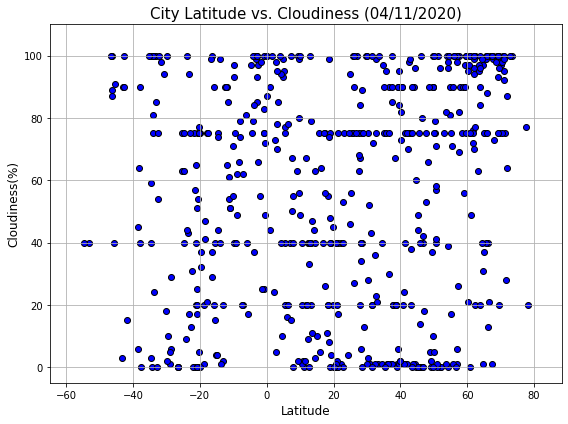

In [14]:
x_axis=weather_df["Lat"]
y_axis=weather_df["Cloudiness"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Cloudiness(%)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Cloudiness ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Cloudiness"]-5),max(weather_df["Cloudiness"]+10))
plt.grid()
plt.tight_layout()
plt.savefig('plot_images/City Latitude vs. Cloudiness.png')
plt.show()

#### The Conclusion: TBD

### Latitude vs. Wind Speed Plot

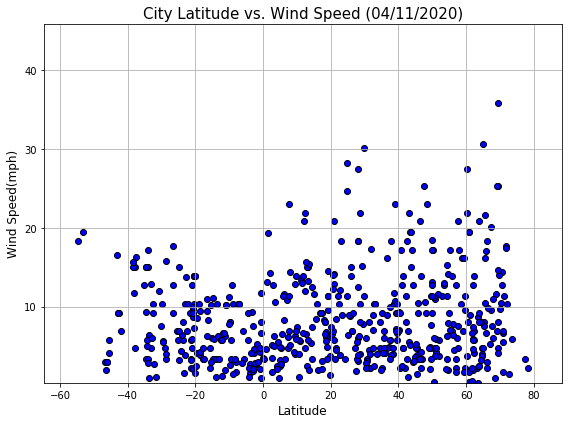

In [15]:
x_axis=weather_df["Lat"]
y_axis=weather_df["Wind Speed"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Wind Speed(mph)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Wind Speed ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Wind Speed"]),max(weather_df["Wind Speed"]+10))
plt.grid()
plt.tight_layout()
plt.savefig('plot_images/City Latitude vs. Wind Speed.png')
plt.show()

#### The Conclusion: TBD

## Linear Regression

In [57]:
# Create a function to create Linear Regression plots
def line_reg(x_axis,y_axis,name_ylabel,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8,6))
    plt.scatter(x_axis,y_axis, marker="o", color="blue",edgecolor="black")
    plt.ylabel(name_ylabel,fontSize=11)
    plt.xlabel('Latitude',fontSize=11)
    plt.title(title,fontSize=12)
    plt.xticks(fontSize=10)
    plt.yticks(fontSize=10)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(min(x_axis),min(y_axis)),fontsize=15,color="red")
    plt.grid()
    file_name=title[:title.find(f'({current_d})']
    plt.savefig(f'plot_images/{file_name}.png')
    plt.show()

SyntaxError: invalid syntax (<ipython-input-57-690adcfca4ac>, line 17)

In [56]:
# Create Northern and Southern Hemisphere DataFrames
s_hem=weather_df[weather_df["Lat"]<0]
n_hem=weather_df[weather_df["Lat"]>=0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8831302857888166


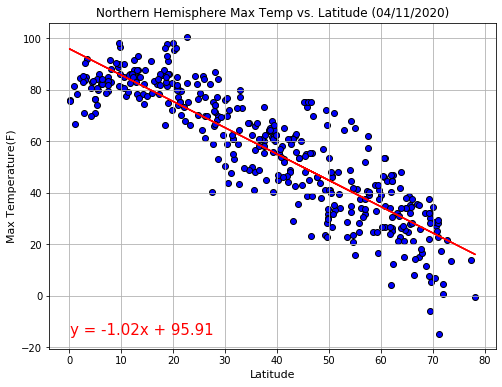

In [47]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Max Tem"]
name_ylabel="Max Temperature(F)"
title=f"Northern Hemisphere Max Temp vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6680367089119874


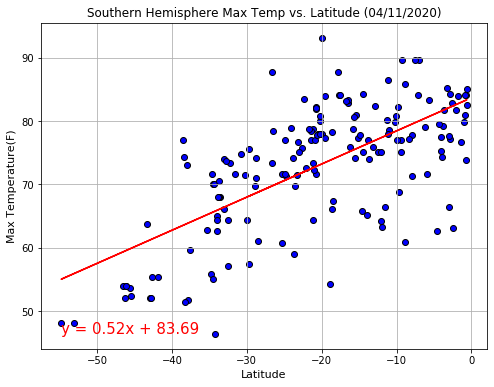

In [48]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Max Tem"]
name_ylabel="Max Temperature(F)"
title=f"Southern Hemisphere Max Temp vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### The Conclusion: TBD

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29313920874337035


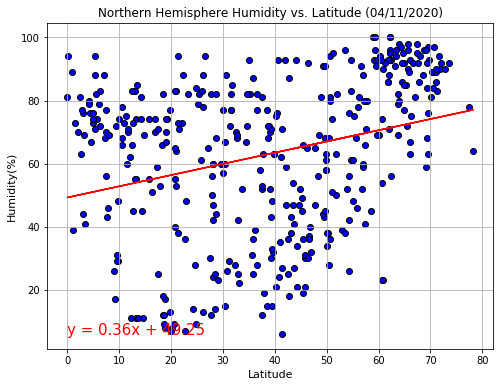

In [49]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Humidity"]
name_ylabel="Humidity(%)"
title=f"Northern Hemisphere Humidity vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21153395981942996


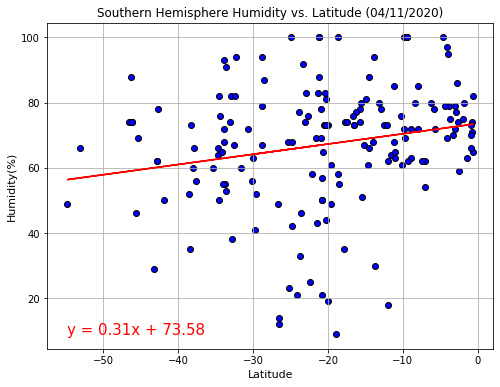

In [50]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Humidity"]
name_ylabel="Humidity(%)"
title=f"Southern Hemisphere Humidity vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### The Conclusion: TBD

 ### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25585866598979


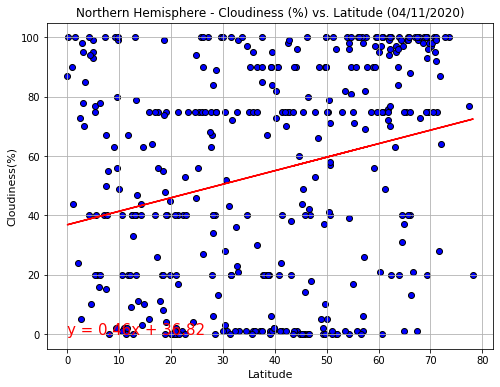

In [51]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Cloudiness"]
name_ylabel="Cloudiness(%)"
title=f"Northern Hemisphere - Cloudiness (%) vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07746710745322488


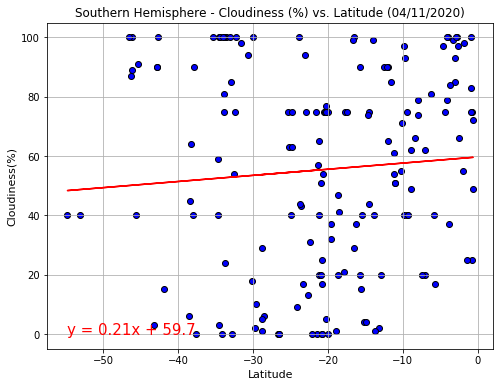

In [52]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Cloudiness"]
name_ylabel="Cloudiness(%)"
title=f"Southern Hemisphere - Cloudiness (%) vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### The Conclusion: TBD

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07213181987287721


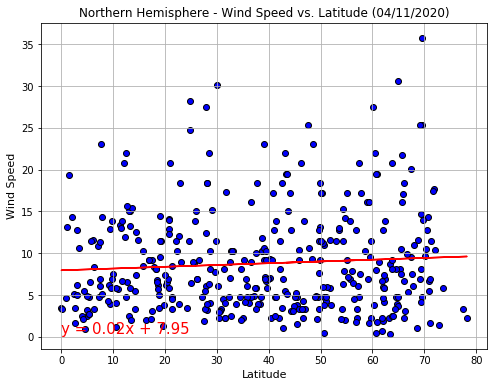

In [53]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Wind Speed"]
name_ylabel="Wind Speed"
title=f"Northern Hemisphere - Wind Speed vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.33301046277183866


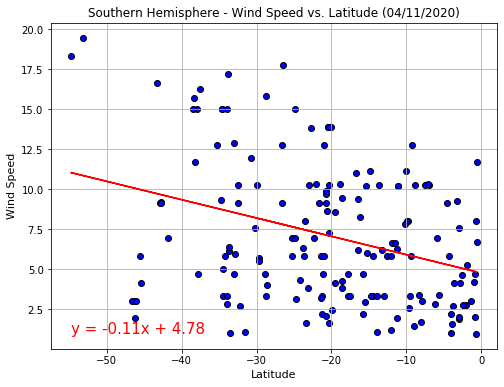

In [54]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Wind Speed"]
name_ylabel="Wind Speed"
title=f"Southern Hemisphere - Wind Speed vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### The Conclusion: TBD